# Penerapan Algoritma Machine Learning Klasifikasi
- **Nama:** Muhamad Fajri Permana Haryanto
- **Email:** muhamadfajri2804@gmail.com
- **ID Dicoding:** mijimo



# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri. ✅ (https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset)
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas. ✅
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna. ✅ (1000 baris pas)
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: ✅ (Gender, Product Category)
     - *Numerikal*: ✅ (Age, Quantity,Price per Unit,Total Amount)

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan. ✅ (tidak ada)

# **2. Import Library**

liblary python yang digunkaan untuk analisis data dan pembangunan model machine learningclustering ini.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# **3. Memuat Dataset**

Untuk datasetnya, saya simpen digoogle drive ya

In [2]:
retail_df = pd.read_csv("datadicoding/retail_sales_dataset.csv")
retail_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset retail_sales_dataset.csv (retail_df)


## a. **Memahami Struktur Data**

###- Tinjau jumlah baris dan kolom dalam dataset.  
   

In [3]:
retail_df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


### - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

In [4]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


## b. **Menangani Data yang Hilang**  

   ### - Identifikasi dan analisis data yang hilang (*missing values*).

In [5]:
retail_df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", retail_df.duplicated().sum())

Jumlah duplikasi:  0


### - Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.



**Menghapus beberapa kolom/fitur yang tidak relavan untuk analisis ini**

In [7]:
retail_df.drop(columns=['Transaction ID', 'Customer ID', 'Date'], inplace=True)
retail_df.head()

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,Male,34,Beauty,3,50,150
1,Female,26,Clothing,2,500,1000
2,Male,50,Electronics,1,30,30
3,Male,37,Clothing,1,500,500
4,Male,30,Beauty,2,50,100


## c. **Analisis Distribusi dan Korelasi**  

### - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.

#### 1.Distribusi fitur numerik (histograms)

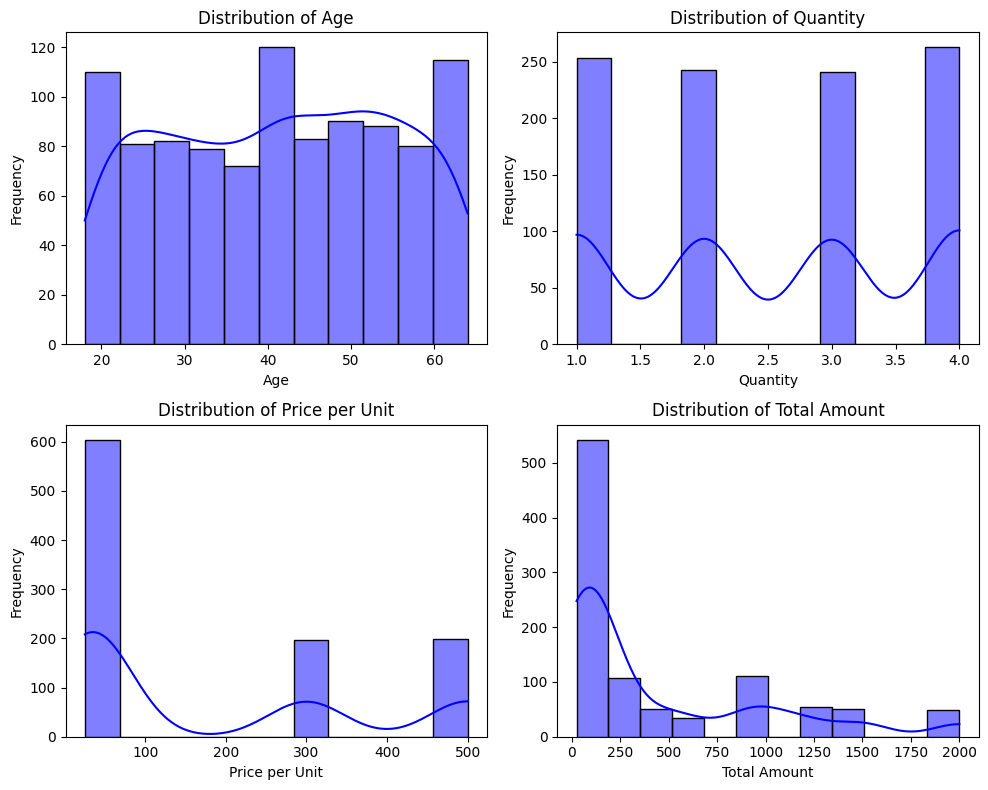

In [8]:
num_features = retail_df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10, 8))
for i, column in enumerate(num_features, 1):
    plt.subplot(2, (len(num_features) + 1) // 2, i)
    sns.histplot(retail_df[column], kde=True, color="blue")
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### 2. Distribusi fitur numerik (Boxplots)

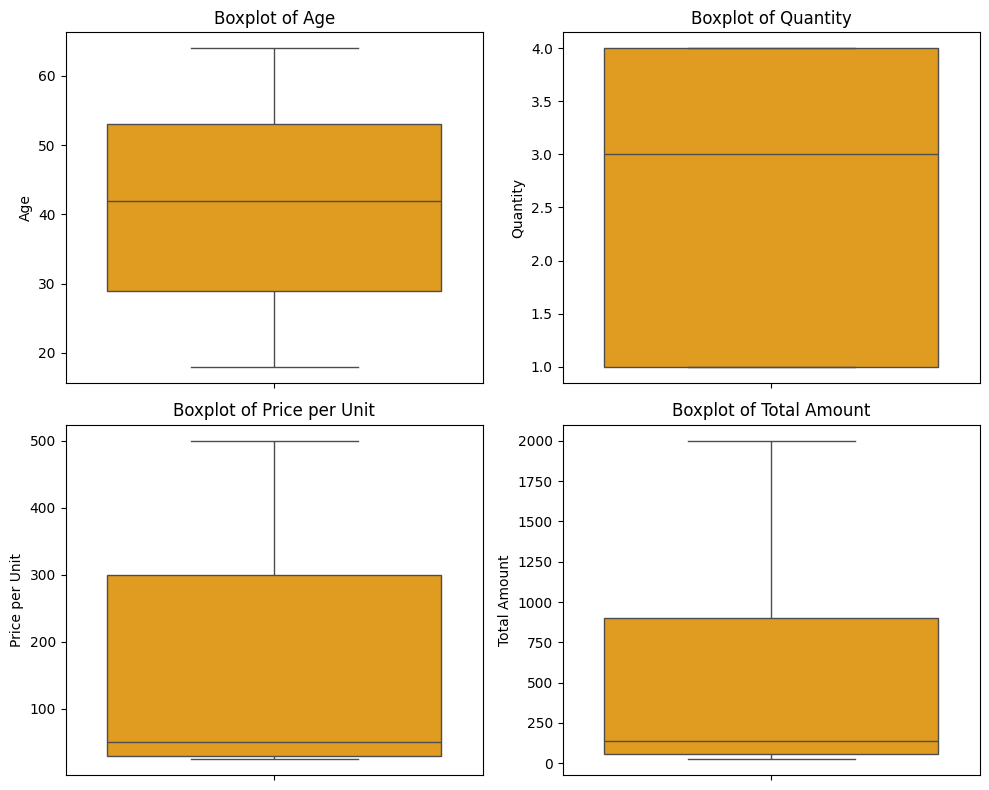

In [9]:
plt.figure(figsize=(10, 8))
for i, column in enumerate(num_features, 1):
    plt.subplot(2, (len(num_features) + 1) // 2, i)
    sns.boxplot(data=retail_df, y=column, color="orange")
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

 - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

**Pairplot untuk fitur numerik**

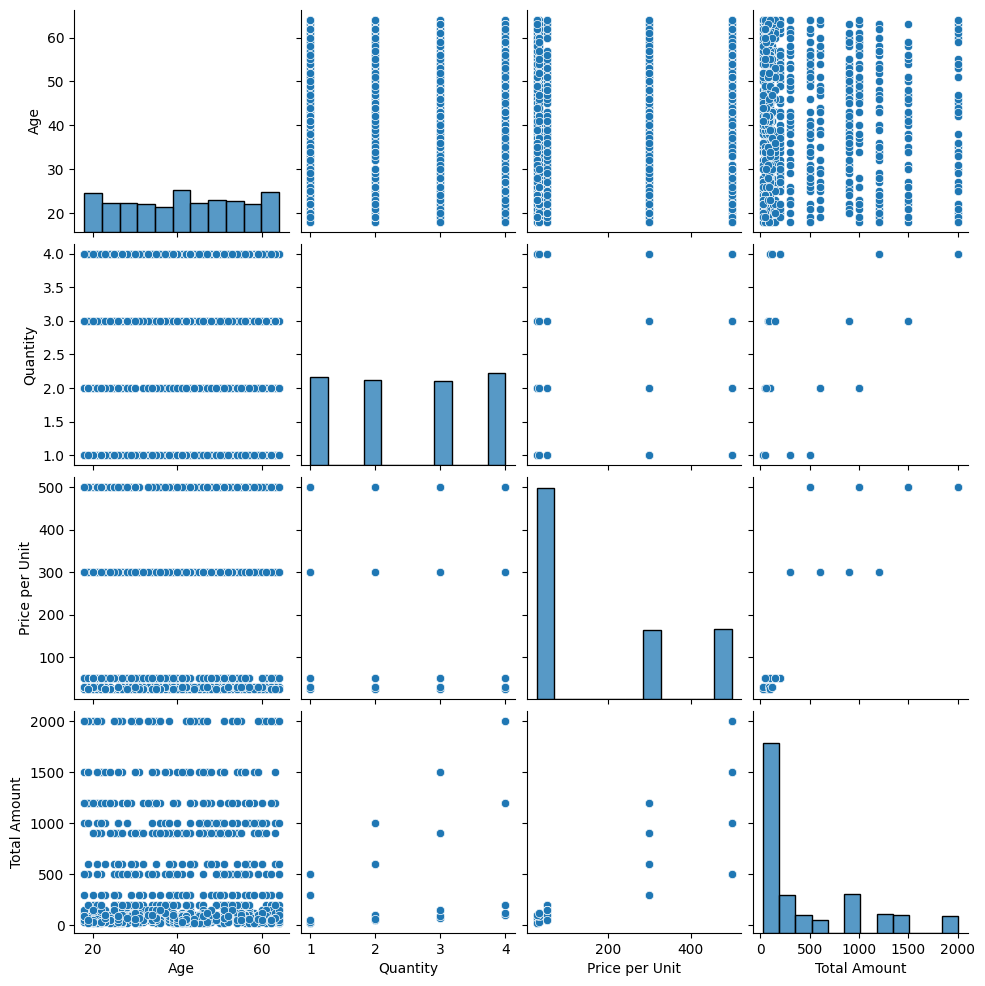

In [10]:
sns.pairplot(retail_df[num_features])
plt.show()

## d. **Visualisasi Data**  


 ### - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  

**Distribusi fitur kategorikal**

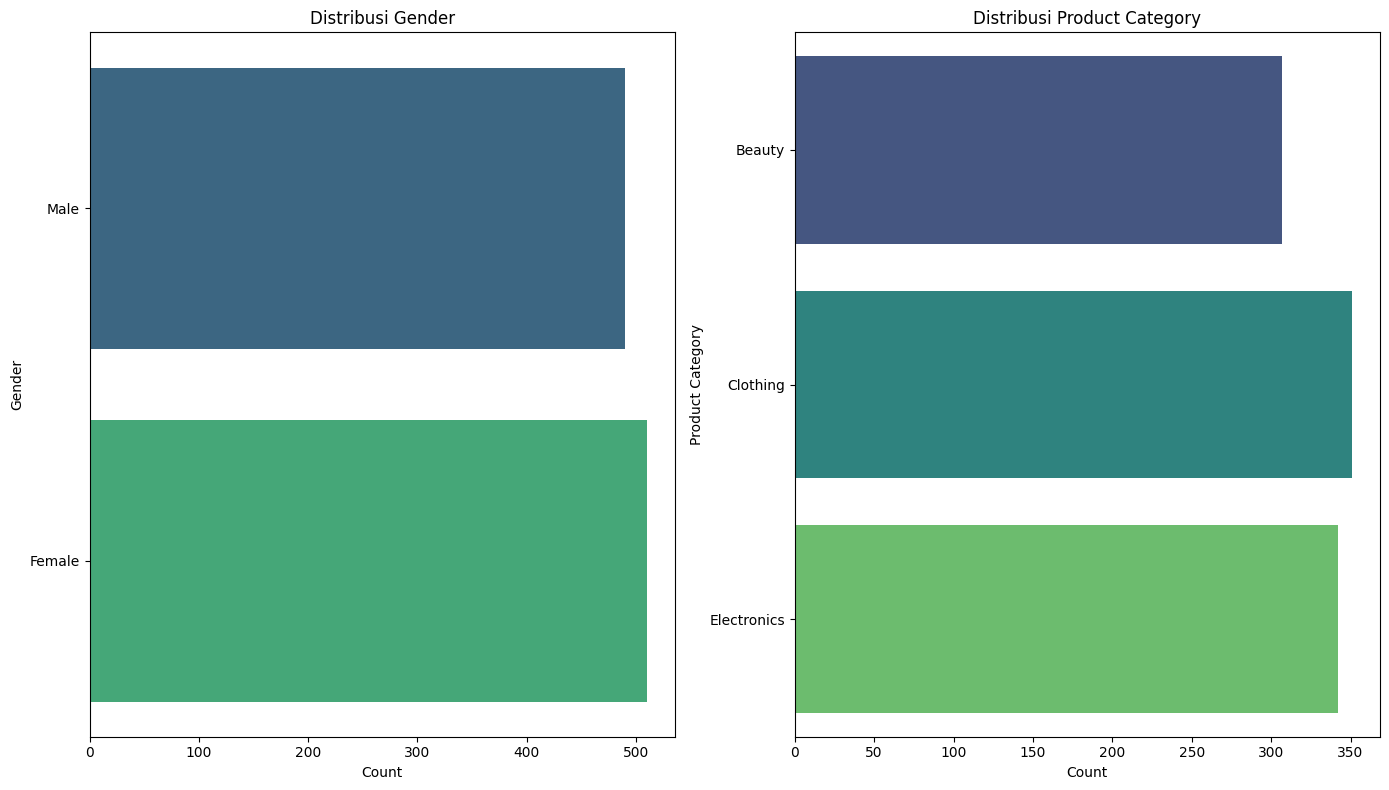

In [11]:
cat_features = retail_df.select_dtypes(include=['object']).columns
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features, 1):
    plt.subplot(1, len(cat_features), i)
    sns.countplot(y=retail_df[column], palette='viridis', hue=retail_df[column], legend=False)
    plt.title(f'Distribusi {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

### - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.



**Heatmap korelasi untuk fitur numerik**

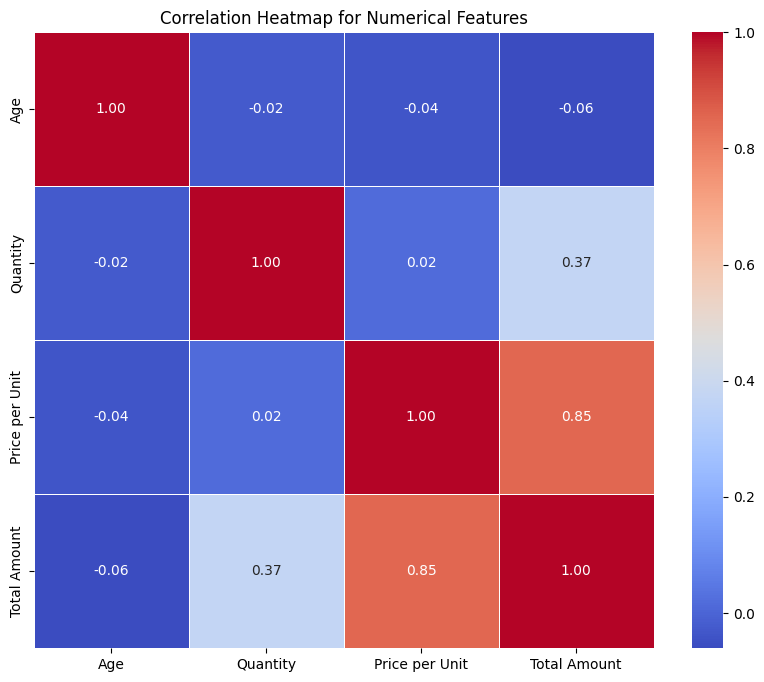

In [12]:
plt.figure(figsize=(10, 8))
correlation_matrix = retail_df[num_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Numerical Features")
plt.show()

# **5. Data Preprocessing**


Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:



## **a. Menghapus atau Menangani Data Kosong (Missing Values)**

In [13]:
retail_df.isnull().sum()

Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Berdasarkan dari pengecekan awal, data set inih **tidak ditemukan Missing Value** yang berarti data set yang saya inih lumayan bagus ✅

## **b. Menghapus Data Duplikat**


In [14]:
print("Jumlah duplikasi: ", retail_df.duplicated().sum())

Jumlah duplikasi:  89


In [15]:
# Menampilkan beberapa baris duplikat
retail_df[retail_df.duplicated()].head()

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
41,Male,22,Clothing,3,300,900
107,Female,27,Beauty,3,25,75
130,Female,21,Beauty,2,300,600
172,Male,64,Electronics,4,30,120
317,Male,61,Clothing,1,25,25


Berdasarkan dari pengecekan awal, data set inih **tidak ditemukan duplikasi data** namun setelah penghapusan kolom/fitur (Date) terjadi dupliaksi, mungkin terjadi karena ada jumlah pada baris yang sama/nilai dari kolom (age, quantanty dan price per unit yang sama) walapun berbeda tanggal transaksi, tapi kolom date dihapus, di karena kan saya mau **analisis untuk mengelompokkan berdasarkan quantity dan spending untuk clustering** maka duplikasinya saya akan hapus. jadi **diambil perwakilannya ajah (data tidak duplikatnnya)**

In [16]:
retail_df = retail_df.drop_duplicates()

In [17]:
print("Jumlah duplikasi: ", retail_df.duplicated().sum())

Jumlah duplikasi:  0


Berdasarkan keputusan yang saya ambil duplikasi pada dataset inih berhasil teratasi ✅

## **c. Normalisasi atau Standarisasi Fitur**


In [18]:
# Normalisasi dan standarisasi fitur numerik
scaler = StandardScaler()
retail_df[num_features] = scaler.fit_transform(retail_df[num_features])

retail_df[num_features].head()

,Age,Quantity,Price per Unit,Total Amount
0,-0.520462,0.428438,-0.686091,-0.547352
1,-1.106092,-0.452617,1.675480,0.962352
2,0.650798,-1.333672,-0.791050,-0.760486
3,-0.300851,-1.333672,1.675480,0.074291
4,-0.813277,-0.452617,-0.686091,-0.636158


## **d. Deteksi dan Penanganan Outlier**


In [19]:
# Mendeteksi outlier pada fitur numerikal
for column in num_features:
    Q1 = retail_df[column].quantile(0.25)
    Q3 = retail_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = retail_df[(retail_df[column] < lower_bound) | (retail_df[column] > upper_bound)]
    print(f"Mendeteksi outliers pada kolom {column}:")
    print(outliers)

Mendeteksi outliers pada kolom Age:
Empty DataFrame
Columns: [Gender, Age, Product Category, Quantity, Price per Unit, Total Amount]
Index: []
Mendeteksi outliers pada kolom Quantity:
Empty DataFrame
Columns: [Gender, Age, Product Category, Quantity, Price per Unit, Total Amount]
Index: []
Mendeteksi outliers pada kolom Price per Unit:
Empty DataFrame
Columns: [Gender, Age, Product Category, Quantity, Price per Unit, Total Amount]
Index: []
Mendeteksi outliers pada kolom Total Amount:
Empty DataFrame
Columns: [Gender, Age, Product Category, Quantity, Price per Unit, Total Amount]
Index: []


In [20]:
retail_df.head()

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,Male,-0.520462,Beauty,0.428438,-0.686091,-0.547352
1,Female,-1.106092,Clothing,-0.452617,1.675480,0.962352
2,Male,0.650798,Electronics,-1.333672,-0.791050,-0.760486
3,Male,-0.300851,Clothing,-1.333672,1.675480,0.074291
4,Male,-0.813277,Beauty,-0.452617,-0.686091,-0.636158


## **e. Encoding Data Kategorikal**


### 1. Label Encoding untuk Gender

In [21]:
label_encoder = LabelEncoder()
retail_df['Gender'] = label_encoder.fit_transform(retail_df['Gender'])
retail_df[['Gender']].head()

,Gender
0,1
1,0
2,1
3,1
4,1


### 2. One-Hot Encoding untuk Product Category

In [22]:
retail_df = pd.get_dummies(retail_df, columns=['Product Category'], drop_first=False)
retail_df.head()

,Gender,Age,Quantity,Price per Unit,Total Amount,Product Category_Beauty,Product Category_Clothing,Product Category_Electronics
0,1,-0.520462,0.428438,-0.686091,-0.547352,True,False,False
1,0,-1.106092,-0.452617,1.675480,0.962352,False,True,False
2,1,0.650798,-1.333672,-0.791050,-0.760486,False,False,True
3,1,-0.300851,-1.333672,1.675480,0.074291,False,True,False
4,1,-0.813277,-0.452617,-0.686091,-0.636158,True,False,False


## **f. Binning (Pengelompokan Data)**

### 1. binning untuk Quantity

In [23]:
retail_df['Quantity_binned'] = pd.cut(retail_df['Quantity'], bins=[-float('inf'), 0.5, float('inf')], labels=['Low', 'High'])

### 2. binning untuk Total Amount

In [24]:
retail_df['Total_Amount_binned'] = pd.cut(retail_df['Total Amount'], bins=[-float('inf'), 0.5, float('inf')], labels=['Low', 'High'])

In [25]:
retail_df.head()

,Gender,Age,Quantity,Price per Unit,Total Amount,Product Category_Beauty,Product Category_Clothing,Product Category_Electronics,Quantity_binned,Total_Amount_binned
0,1,-0.520462,0.428438,-0.686091,-0.547352,True,False,False,Low,Low
1,0,-1.106092,-0.452617,1.675480,0.962352,False,True,False,Low,High
2,1,0.650798,-1.333672,-0.791050,-0.760486,False,False,True,Low,Low
3,1,-0.300851,-1.333672,1.675480,0.074291,False,True,False,Low,Low
4,1,-0.813277,-0.452617,-0.686091,-0.636158,True,False,False,Low,Low


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

### 1. Pilih algoritma clustering yang sesuai.


Diguanakan algoritma K-means dengan methode elbow karna palingg sesuai

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

In [27]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(retail_df[['Quantity', 'Total Amount']])

### 2. Latih model dengan data menggunakan algoritma tersebut.

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


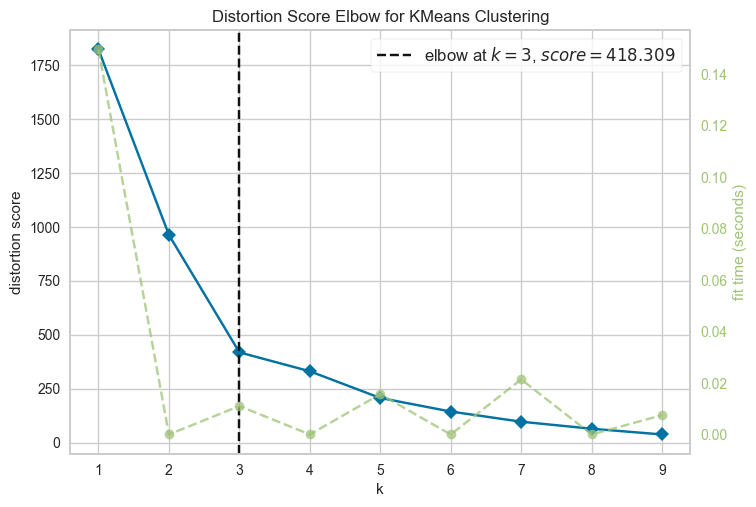

,Gender,Age,Quantity,Price per Unit,Total Amount,Product Category_Beauty,Product Category_Clothing,Product Category_Electronics,Quantity_binned,Total_Amount_binned,Cluster
0,1,-0.520462,0.428438,-0.686091,-0.547352,True,False,False,Low,Low,2
1,0,-1.106092,-0.452617,1.675480,0.962352,False,True,False,Low,High,0
2,1,0.650798,-1.333672,-0.791050,-0.760486,False,False,True,Low,Low,3
3,1,-0.300851,-1.333672,1.675480,0.074291,False,True,False,Low,Low,3
4,1,-0.813277,-0.452617,-0.686091,-0.636158,True,False,False,Low,Low,1


In [28]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(scaled_data)
visualizer.show()
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(scaled_data)
labels = kmeans.labels_
retail_df['Cluster'] = labels
retail_df.head()

## **b. Evaluasi Model Clustering**


### 1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.


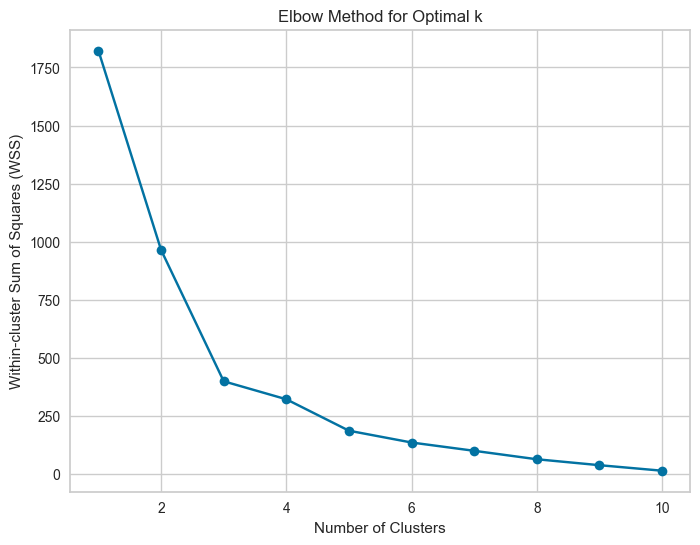

In [29]:
wss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    wss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.show()

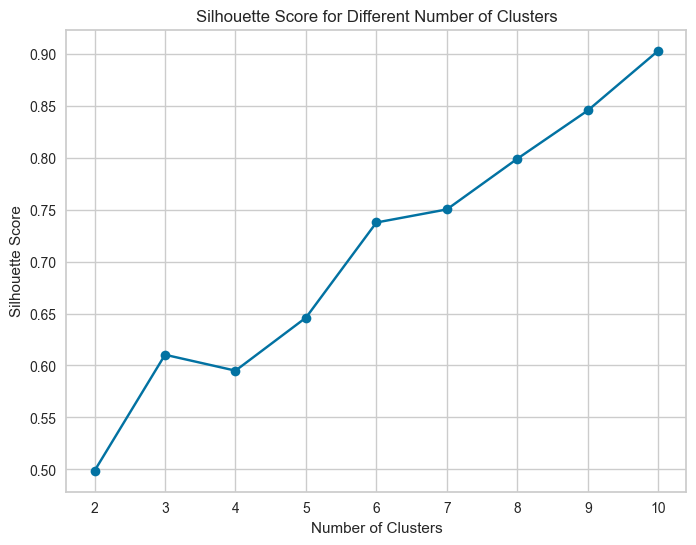

In [30]:
from sklearn.metrics import silhouette_score

sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    sil_scores.append(score)


plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

### 2.Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [31]:
from sklearn.metrics import silhouette_score

sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    sil_scores.append(score)
    print(f'k={k}, Silhouette Score={score:.3f}')

optimal_k_sil = 2 + sil_scores.index(max(sil_scores))
print(f'Optimal k berdasarkan Silhouette Score: {optimal_k_sil}')


k=2, Silhouette Score=0.499
k=3, Silhouette Score=0.610
k=4, Silhouette Score=0.595
k=5, Silhouette Score=0.646
k=6, Silhouette Score=0.738
k=7, Silhouette Score=0.750
k=8, Silhouette Score=0.799
k=9, Silhouette Score=0.845
k=10, Silhouette Score=0.903
Optimal k berdasarkan Silhouette Score: 10


In [32]:
total_sil_score = sum(sil_scores)
print(f'Jumlah total Silhouette Scores: {total_sil_score:.3f}')

Jumlah total Silhouette Scores: 6.385


### Evaluasi dari Elbow Method dan Silhouette Score

- Elbow Method merekomendasikan **k = 4** karena penurunan WSS mulai melambat setelah titik tersebut, menunjukkan kluster optimal tanpa menambah kompleksitas.

- Silhouette Score merekomendasikan **k = 10** karena nilai tertinggi tercapai pada jumlah kluster ini, menunjukkan pemisahan kluster yang lebih baik.

## **c. Feature Selection (Opsional)**


Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

Saya memutuskan untuk **tidak melakukan feature selection** lebih lanjut **karena fitur-fitur yang tidak relevan, seperti Transaction ID, Date, dan Customer ID, sudah dihapus sebelumnya.** Oleh karena itu, melanjutkan ke tahap pemodelan tanpa feature selection sudah cukup

## **d. Visualisasi Hasil Clustering**



Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

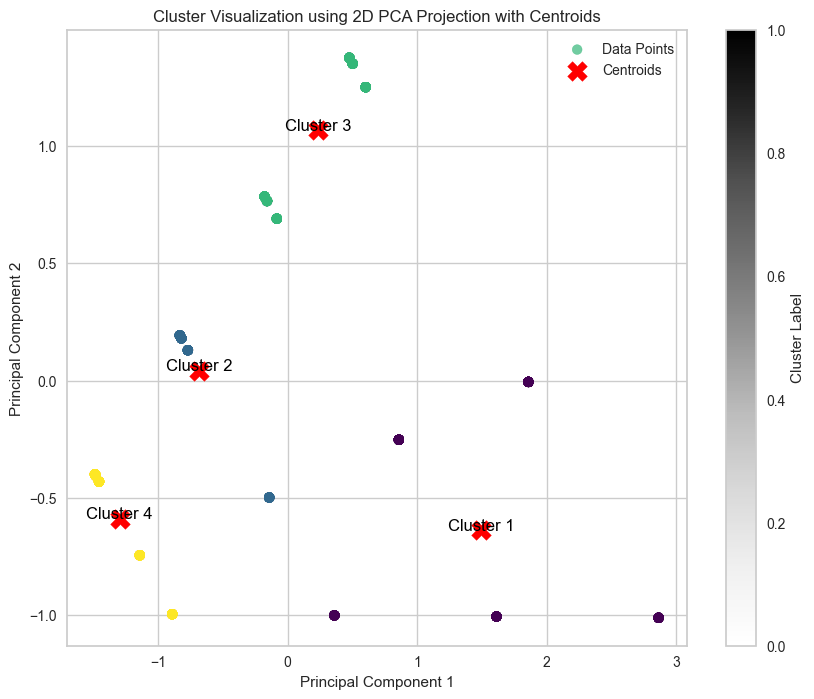

In [33]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
plt.figure(figsize=(10, 8))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7, label='Data Points')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker='X', label='Centroids')
for i, centroid in enumerate(centroids_pca):
    plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='black', fontsize=12, ha='center')


plt.title('Cluster Visualization using 2D PCA Projection with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.grid(True)
plt.show()


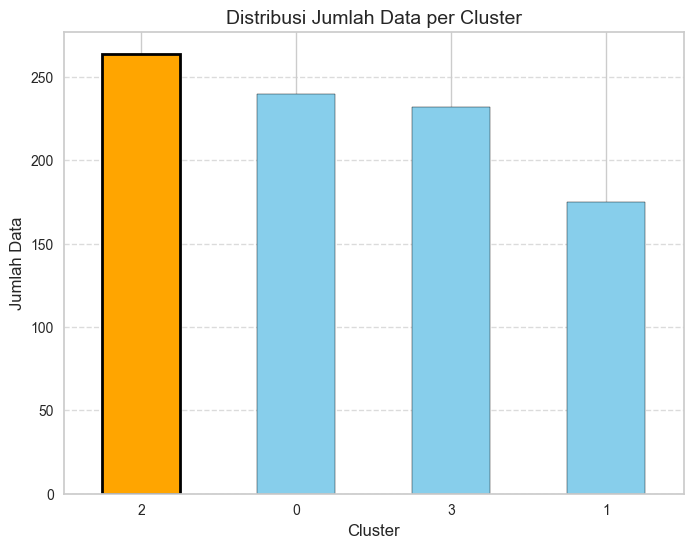

In [34]:
cluster_counts = retail_df['Cluster'].value_counts()

max_cluster = cluster_counts.idxmax()

plt.figure(figsize=(8, 6))

bars = cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')

for i, bar in enumerate(bars.patches):
    if cluster_counts.index[i] == max_cluster:
        bar.set_facecolor('orange')
        bar.set_linewidth(2)

plt.title('Distribusi Jumlah Data per Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Jumlah Data', fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**


### 1.Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia.


In [35]:
# Menghitung rata-rata dan statistik deskriptif untuk setiap cluster
cluster_analysis = retail_df.groupby('Cluster').agg({
    'Quantity': ['mean', 'std', 'min', 'max'],
    'Price per Unit': ['mean', 'std', 'min', 'max'],
    'Total Amount': ['mean', 'std', 'min', 'max']
}).reset_index()

cluster_analysis


Cluster  Quantity                               Price per Unit            \
               mean       std       min       max           mean       std   
0       0  0.604650  0.645783 -0.452617  1.309494       1.229405  0.519940   
1       1 -0.452617  0.000000 -0.452617 -0.452617      -0.504663  0.548946   
2       2  0.922363  0.438110  0.428438  1.309494      -0.761630  0.058161   
3       3 -1.333672  0.000000 -1.333672 -1.333672      -0.024444  1.003180   

                      Total Amount                                
        min       max         mean       std       min       max  
0  0.625893  1.675480     1.505549  0.705713  0.784740  2.738474  
1 -0.817290  0.625893    -0.513352  0.371573 -0.724964  0.251903  
2 -0.817290 -0.686091    -0.588088  0.079313 -0.680561 -0.458546  
3 -0.817290  1.675480    -0.501035  0.339518 -0.769367  0.074291

### 2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

1. **Cluster 0:** Pelanggan dengan Quantity High dan Spending High
 - Rata-rata Quantity: 0.60 (cukup tinggi, berarti pembelian rata-rata lebih banyak).
 - Rata-rata Price per Unit: 1.23 (nilai harga per unit relatif tinggi).
 - Rata-rata Total Amount: 1.68 (total pembelian rata-rata juga tinggi).
 - **Interpretasi:** Cluster ini berisi pembeli yang sering membeli dalam jumlah banyak dengan harga per unit yang lebih tinggi. Ini bisa menggambarkan **pelanggan yang melakukan pembelian dalam jumlah besar atau pembelian dengan harga premium**.

2. **Cluster 1:** Pelanggan dengan Quantity Low dan Spending Low
 - Rata-rata Quantity: -0.45 (kuantitas rata-rata rendah).
 - Rata-rata Price per Unit: -0.50 (harga per unit relatif rendah).
 - Rata-rata Total Amount: -0.51 (total pembelian juga rendah).
 - **Interpretasi:** Cluster ini berisi pelanggan dengan pembelian yang sedikit, baik dari segi kuantitas maupun harga produk. Mungkin berisi **pelanggan yang melakukan pembelian sedikit dengan harga murah**.

3. **Cluster 2:** Pelanggan dengan Quantity High dan Spending Low
 - Rata-rata Quantity: 0.92 (kuantitas pembelian cukup tinggi).
 - Rata-rata Price per Unit: -0.76 (harga per unit relatif rendah).
 - Rata-rata Total Amount: -0.69 (total pembelian lebih rendah dibanding cluster 0).
 - **Interpretasi:** Meskipun **pelanggan di cluster ini membeli dalam jumlah lebih banyak, mereka membeli produk dengan harga yang lebih murah**, yang menghasilkan total pembelian yang lebih rendah dibandingkan cluster 0.

4. **Cluster 3:** Pelanggan dengan Quantity Low dan Spending Medium
 - Rata-rata Quantity: -1.33 (sangat rendah, menunjukkan pembelian sangat sedikit).
 - Rata-rata Price per Unit: -0.02 (harga per unit dekat rata-rata).
 - Rata-rata Total Amount: -0.50 (total pembelian sangat rendah).
 - **Interpretasi:** Cluster ini berisi pembeli yang sangat jarang melakukan pembelian, dan meskipun harga per unit tidak terlalu tinggi, total pembelian tetap rendah. Bisa jadi ini adalah pelanggan yang jarang melakukan pembelian atau membeli dengan kuantitas kecil.


1. **Cluster 0 (Quantity High, Spending High):**
Untuk pelanggan di cluster ini, disarankan untuk mengimplementasikan program loyalitas premium, penawaran eksklusif, serta diskon untuk pembelian dalam jumlah besar. Fokus pada produk berkualitas tinggi dan layanan pelanggan yang lebih personal untuk menjaga kepuasan dan meningkatkan retensi.

2. **Cluster 1 (Quantity Low, Spending Low):**
 Strategi yang tepat untuk cluster ini adalah dengan menawarkan promosi yang lebih agresif, seperti bundling produk atau diskon pada pembelian pertama, guna mendorong mereka untuk meningkatkan frekuensi pembelian. Cross-selling produk dengan harga terjangkau juga dapat meningkatkan volume transaksi mereka.

3. **Cluster 2 (Quantity High, Spending Low):**
 Untuk memaksimalkan potensi pelanggan di cluster ini, sebaiknya menawarkan produk dalam paket bundling dengan harga lebih kompetitif, serta memberikan insentif berbasis volume untuk mendorong pembelian berulang. Penawaran harga yang menarik untuk pembelian lebih banyak dapat meningkatkan total belanja mereka.

4. **Cluster 3 (Quantity Low, Spending Medium):**
 Pelanggan pada cluster ini dapat ditingkatkan dengan pendekatan personalisasi yang lebih tajam, seperti memberikan rekomendasi produk yang sesuai dengan preferensi mereka. Selain itu, memberikan diskon atau insentif untuk pembelian berikutnya dapat mendorong peningkatan frekuensi pembelian dan retensi pelanggan.

# 7. Mengeksport Data


## **Simpan hasilnya ke dalam file CSV.**

In [36]:
retail_df['Cluster'] = kmeans.labels_
retail_df.to_csv('hasil_clustering.csv', index=False)
print("Data berhasil disimpan dalam file hasil_clustering.csv")

Data berhasil disimpan dalam file hasil_clustering.csv
